# UKHSA CASES DATA VISUALISATION

### After cleaning, the dataset contains 11,628 entries and 9 columns. The columns are: 

- date - The date of the observation.

- area_name - The name of the area.

- new_first_episodes_by_specimen_date - Count of new first episodes by specimen date.

- new_cases_pcr_only_by_specimen_date - New cases confirmed by PCR only.

- new_cases_lfd_only_by_specimen_date - New cases confirmed by LFD only.

- new_cases_lfd_confirmed_by_pcr_by_specimen_date - LFD cases confirmed via PCR.

- new_cases_rolling_rate_by_specimen_date - Rolling rate of new cases by specimen date.

- new_cases_by_specimen_date - Total new cases by specimen date.

- new_cases_by_publish_date_rolling_rate - Rolling rate of new cases by publish date.



In [1]:
# Importing libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset.
file_path = r'../../6_cleaned_files/ukhsa_cases_data/ukhsa_cases_data_cleaned.csv'  
data = pd.read_csv(file_path)

# Displaying first few rows of the dataset. 
data.head()


,date,area_name,new_first_episodes_by_specimen_date,new_cases_pcr_only_by_specimen_date,new_cases_lfd_only_by_specimen_date,new_cases_lfd_confirmed_by_pcr_by_specimen_date,new_cases_rolling_rate_by_specimen_date,new_cases_by_specimen_date,new_cases_by_publish_date_rolling_rate
0,2020-06-01 00:00:00,north_east,69.0,69.0,0.0,0.0,18.7,69.0,11.6
1,2020-06-01 00:00:00,north_west,266.0,266.0,0.0,0.0,26.5,266.0,9.7
2,2020-06-01 00:00:00,yorkshire_and_the_humber,191.0,191.0,0.0,0.0,27.0,191.0,7.8
3,2020-06-01 00:00:00,east_midlands,218.0,218.0,0.0,0.0,25.2,218.0,6.2
4,2020-06-01 00:00:00,west_midlands,123.0,123.0,0.0,0.0,16.3,123.0,5.2


In [3]:
# Converting the date column to datetime.
data['date'] = pd.to_datetime(data['date'])

# Checking for missing values.
missing_values = data.isnull().sum()
print("Missing Values:", missing_values)

# Summary of the data.
data.describe()


Missing Values: date                                               0
area_name                                          0
new_first_episodes_by_specimen_date                0
new_cases_pcr_only_by_specimen_date                0
new_cases_lfd_only_by_specimen_date                0
new_cases_lfd_confirmed_by_pcr_by_specimen_date    0
new_cases_rolling_rate_by_specimen_date            0
new_cases_by_specimen_date                         0
new_cases_by_publish_date_rolling_rate             0
dtype: int64


,date,new_first_episodes_by_specimen_date,new_cases_pcr_only_by_specimen_date,new_cases_lfd_only_by_specimen_date,new_cases_lfd_confirmed_by_pcr_by_specimen_date,new_cases_rolling_rate_by_specimen_date,new_cases_by_specimen_date,new_cases_by_publish_date_rolling_rate
count,11628,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000
mean,2022-03-08 12:00:00.000000256,1632.942294,1140.390093,442.504816,190.395855,198.421629,1773.383643,363.098839
min,2020-06-01 00:00:00,1.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
25%,2021-04-19 18:00:00,118.000000,69.000000,30.000000,0.000000,20.500000,167.000000,22.000000
50%,2022-03-08 12:00:00,420.500000,196.000000,104.000000,8.000000,60.900000,535.000000,65.200000
75%,2023-01-25 06:00:00,2135.500000,1486.500000,308.000000,93.000000,280.350000,2255.000000,280.450000
max,2023-12-14 00:00:00,35028.000000,32732.000000,10684.000000,6196.000000,3077.400000,40221.000000,33524.000000
std,NaN,2895.651313,2270.642843,984.571357,486.544323,315.398567,3125.515470,2230.557025


### TOTAL CASES BY AREA/REGION 

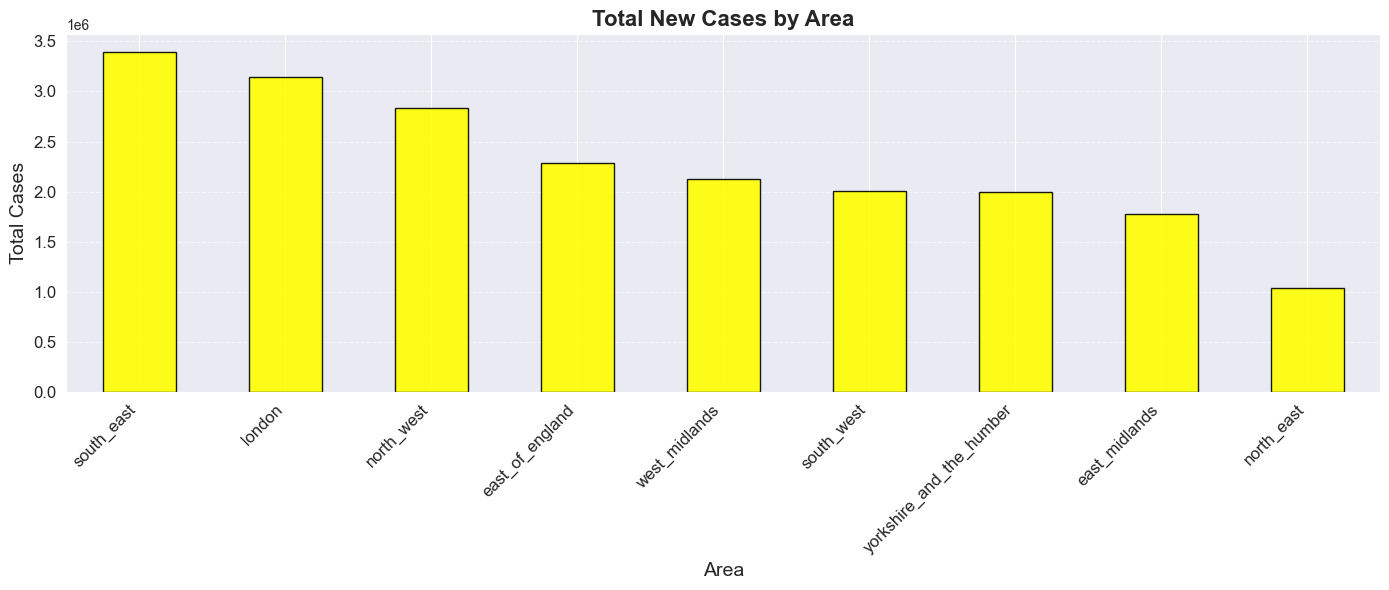

In [4]:
# Grouping data by area.
area_cases = data.groupby('area_name')['new_cases_by_specimen_date'].sum()

#Plot.
plt.figure(figsize=(14, 6))
area_cases.sort_values(ascending=False).plot(
    kind='bar', 
    color='yellow', 
    edgecolor='black', 
    alpha=0.9
)
plt.title('Total New Cases by Area', fontsize=16, fontweight='bold')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


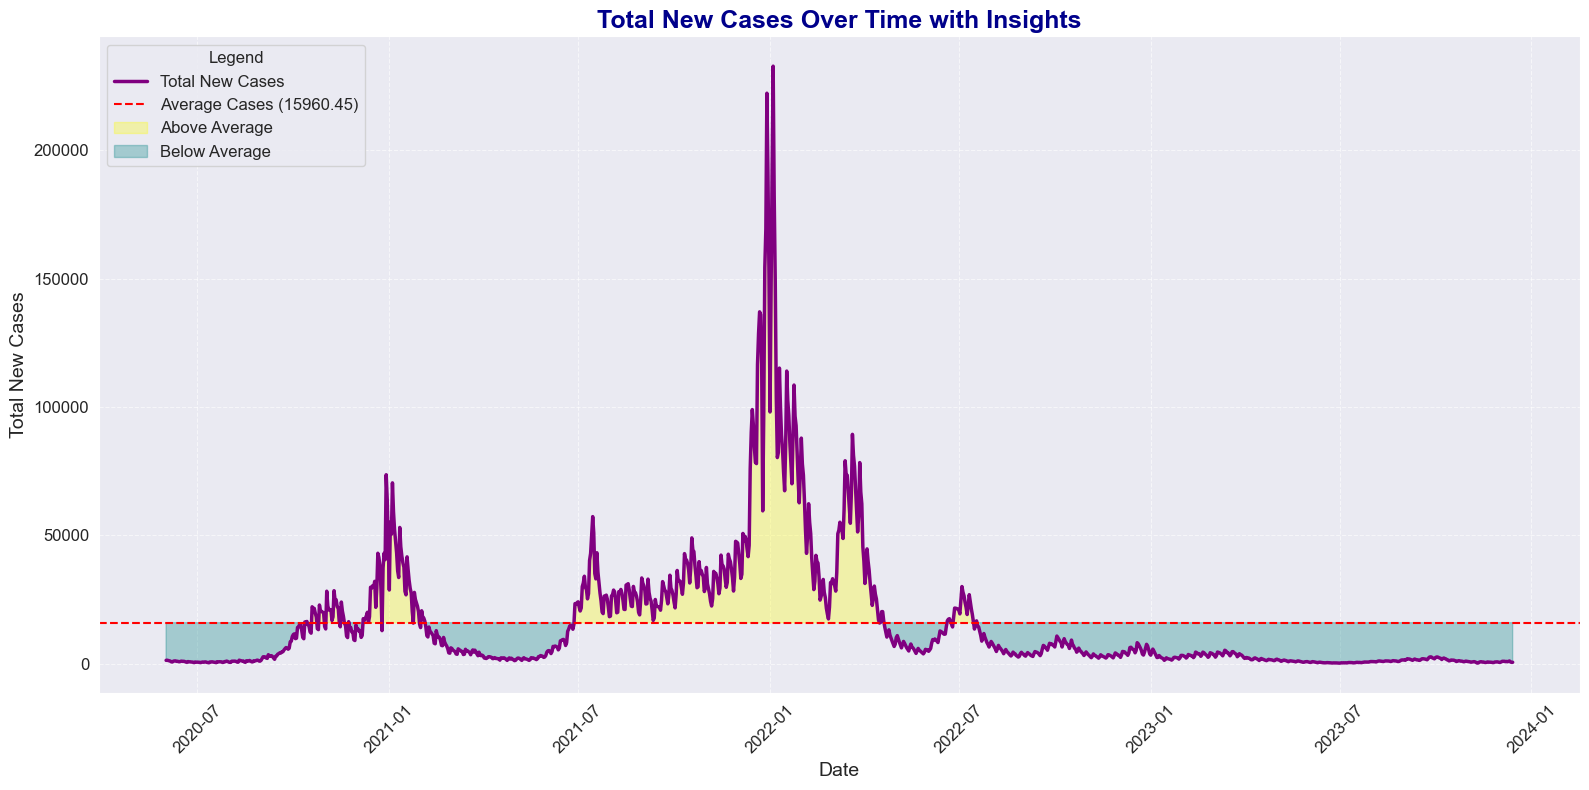

In [5]:
# Showing the total new cases over time. 
# Calculating daily total new cases by summing cases for each date
daily_cases = data.groupby('date')['new_cases_by_specimen_date'].sum()

# Plotting total new cases over time.
plt.figure(figsize=(16, 8))
plt.plot(
    daily_cases, 
    label='Total New Cases', 
    linewidth=2.5, 
    color='purple'
)
plt.axhline(
    y=daily_cases.mean(), 
    color='red', 
    linestyle='--', 
    label=f'Average Cases ({daily_cases.mean():.2f})'
)
plt.fill_between(
    daily_cases.index, 
    daily_cases, 
    daily_cases.mean(), 
    where=(daily_cases > daily_cases.mean()), 
    interpolate=True, 
    color='yellow', 
    alpha=0.3, 
    label='Above Average'
)
plt.fill_between(
    daily_cases.index, 
    daily_cases, 
    daily_cases.mean(), 
    where=(daily_cases < daily_cases.mean()), 
    interpolate=True, 
    color='teal', 
    alpha=0.3, 
    label='Below Average'
)
plt.title('Total New Cases Over Time with Insights', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total New Cases', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left', title='Legend', title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### ROLLING RATE BY REGION/AREA:


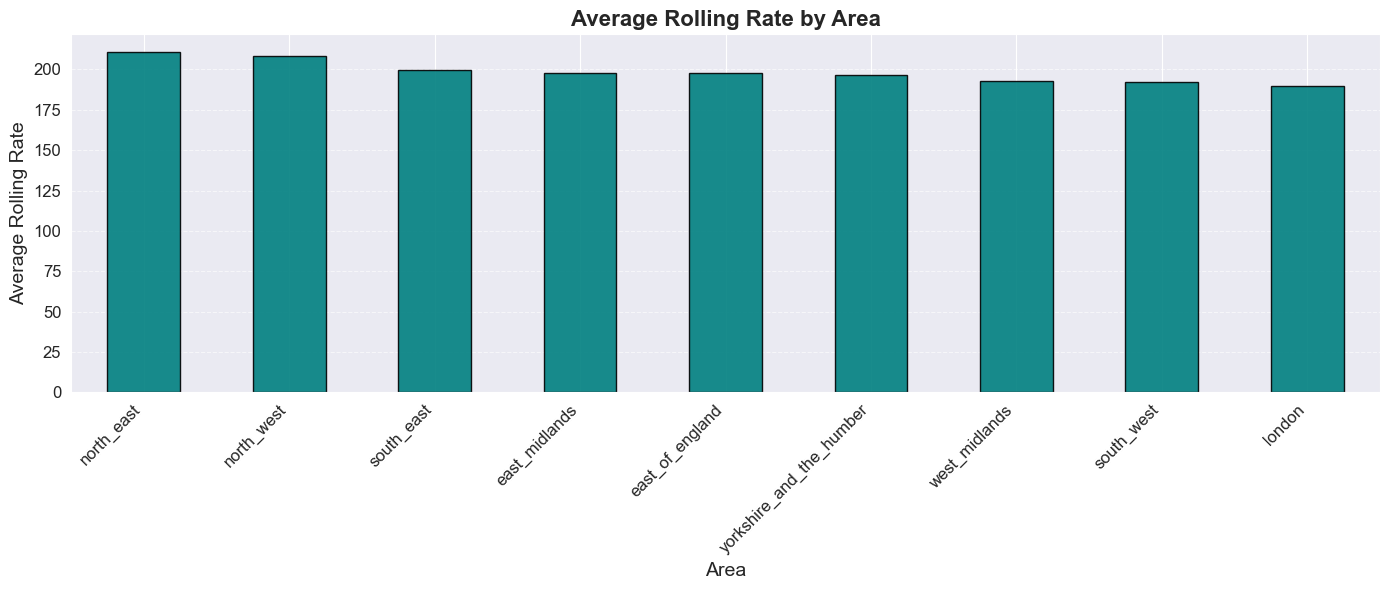

In [6]:
# Calculating average rolling rate by area.
area_rolling_rate = data.groupby('area_name')['new_cases_rolling_rate_by_specimen_date'].mean()

# Plot.
plt.figure(figsize=(14, 6))
area_rolling_rate.sort_values(ascending=False).plot(
    kind='bar', 
    color='teal', 
    edgecolor='black', 
    alpha=0.9 
)
plt.title('Average Rolling Rate by Area', fontsize=16, fontweight='bold')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Average Rolling Rate', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


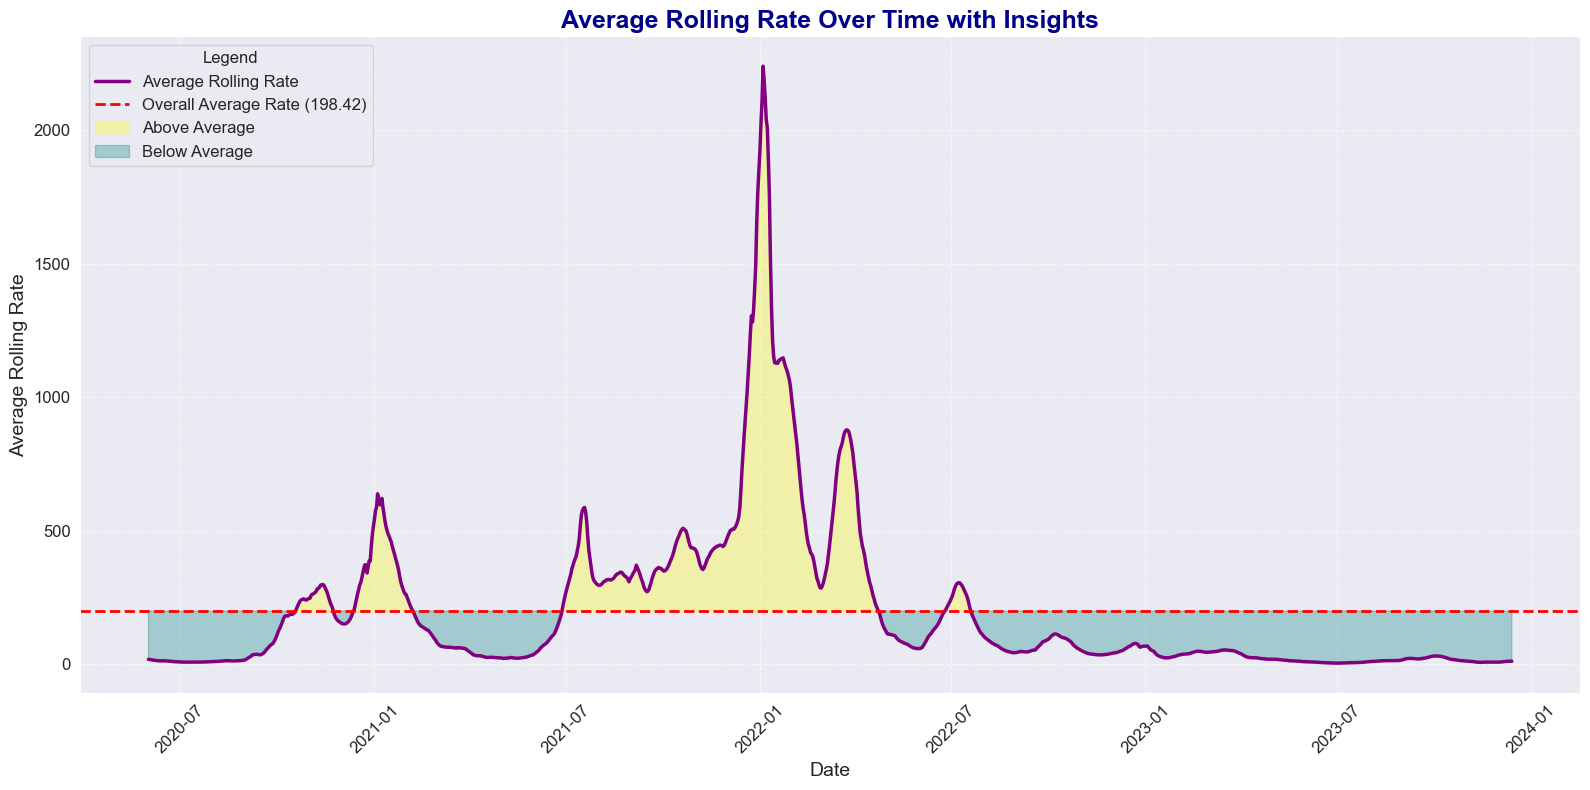

In [7]:
# Calculating the average rolling rate over time. 
# Calculate the average rolling rate by date
daily_rolling_rate = data.groupby('date')['new_cases_rolling_rate_by_specimen_date'].mean()

# Plotting the rolling rate over time. 
plt.figure(figsize=(16, 8))
plt.plot(
    daily_rolling_rate, 
    label='Average Rolling Rate', 
    linewidth=2.5, 
    color='purple'
)
plt.axhline(
    y=daily_rolling_rate.mean(), 
    color='red', 
    linestyle='--', 
    linewidth=2, 
    label=f'Overall Average Rate ({daily_rolling_rate.mean():.2f})'
)
plt.fill_between(
    daily_rolling_rate.index, 
    daily_rolling_rate, 
    daily_rolling_rate.mean(), 
    where=(daily_rolling_rate > daily_rolling_rate.mean()), 
    interpolate=True, 
    color='yellow', 
    alpha=0.3, 
    label='Above Average'
)
plt.fill_between(
    daily_rolling_rate.index, 
    daily_rolling_rate, 
    daily_rolling_rate.mean(), 
    where=(daily_rolling_rate < daily_rolling_rate.mean()), 
    interpolate=True, 
    color='teal', 
    alpha=0.3, 
    label='Below Average'
)
plt.title('Average Rolling Rate Over Time with Insights', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Rolling Rate', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left', title='Legend', title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


### YEARLY COMPARISONS 

In [8]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['teal', 'yellow', 'purple','green'])

# Total new cases by region and year.
plt.figure(figsize=(14, 8))
regional_yearly_cases.plot(
    kind='bar', 
    edgecolor='black', 
    colormap=custom_cmap, 
    figsize=(14, 8),
    alpha=0.9 
)
plt.title('Total New Cases by Region and Year', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Year', fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



NameError: name 'regional_yearly_cases' is not defined

<Figure size 1400x800 with 0 Axes>

### CUMULATIVE CASES OVER TIME BY REGION 

Some regions show steeper curves, indicating faster cumulative case growth. There could be many reasons for this such as a higher population in that region or more intense outbreaks.
The more flatter curves suggests that there may be effective containment measurements in the region, lower transmission rates, and successful interventions i.e. lockdowns and vaccinations. 
The more steeper slopes suggests the known pandemic waves. The difference between the different regions highlights the impact of the pandemic geographically. 

<Figure size 1600x900 with 0 Axes>

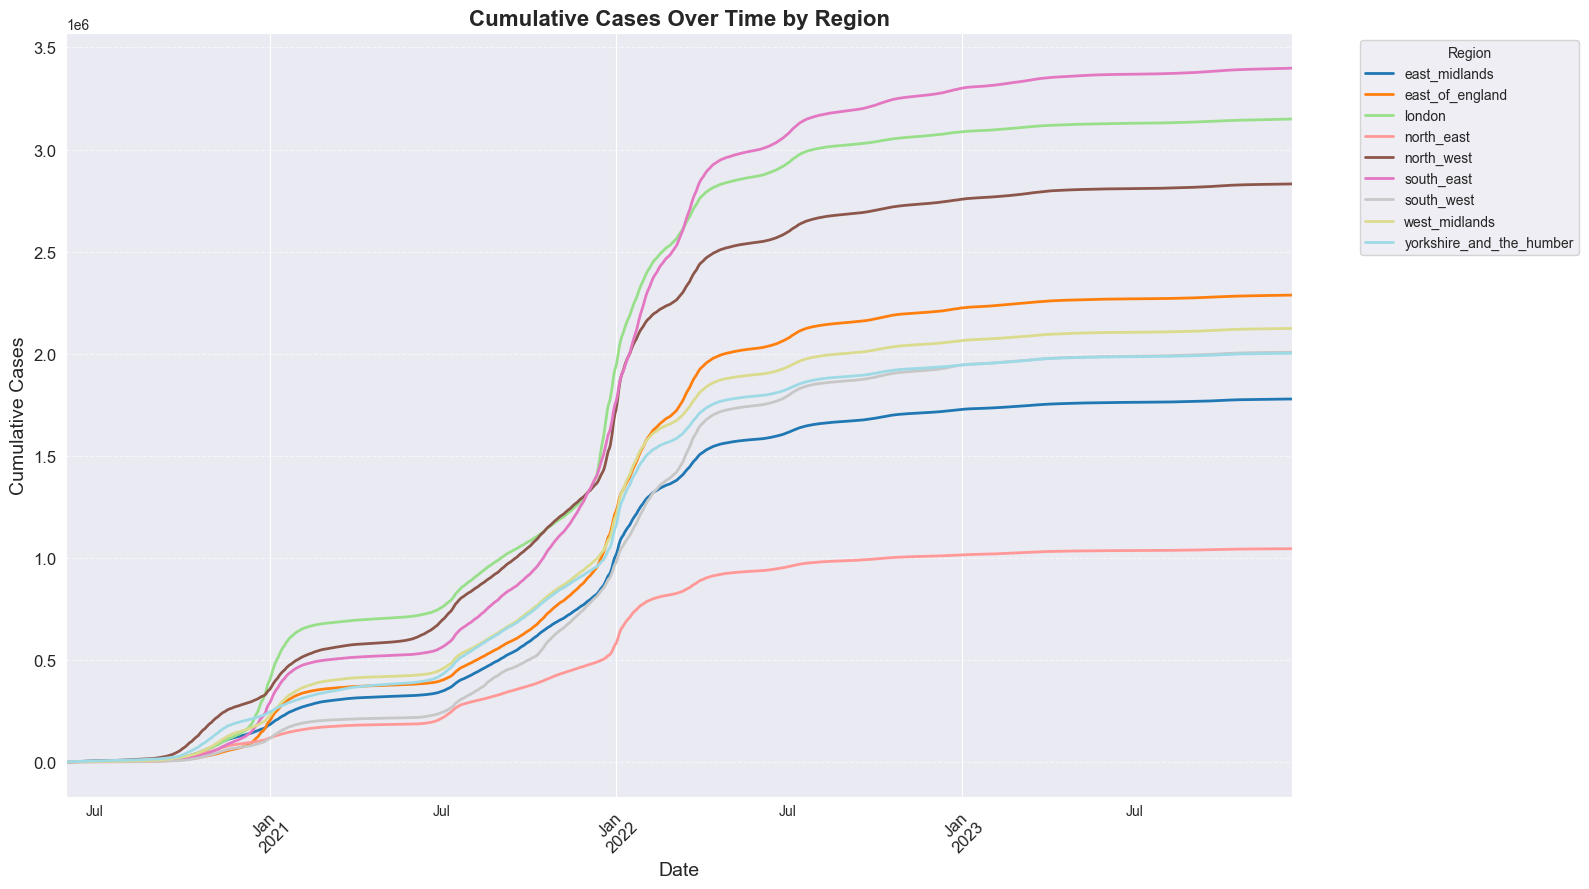

In [9]:
# Calculating cumulative cases by region and date.
cumulative_cases = data.groupby(['date', 'area_name'])['new_cases_by_specimen_date'].sum().groupby(level=1).cumsum().unstack()

# Plot.
plt.figure(figsize=(16, 9))
cumulative_cases.plot(figsize=(16, 9), linewidth=2, cmap='tab20')  
plt.title('Cumulative Cases Over Time by Region', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Cases', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### OUTLIER DETECTION 

The scatter plot of rolling rates over time highlights periods of significant case surges, with the top rolling rates identified as outliers. 
The outliers show the extreme spikes in case transmission rates, which are likely associated with pandemic waves. The outliers cluster around peaks in the rolling which could indicate that these surges aligns with the patterns of increased transmission rather than isolated incidents. This could be for a large number of reasons, such as, high number of gatherings, seasonal variations, policies, etc. 

The statistical summary of the outliers showcases the extent of the extreme values compared to the overall dataset. These shows the importance of monitoring the rolling rates in order to predict and mitigate future outbreaks. This could be beneficial in times of more risk. 

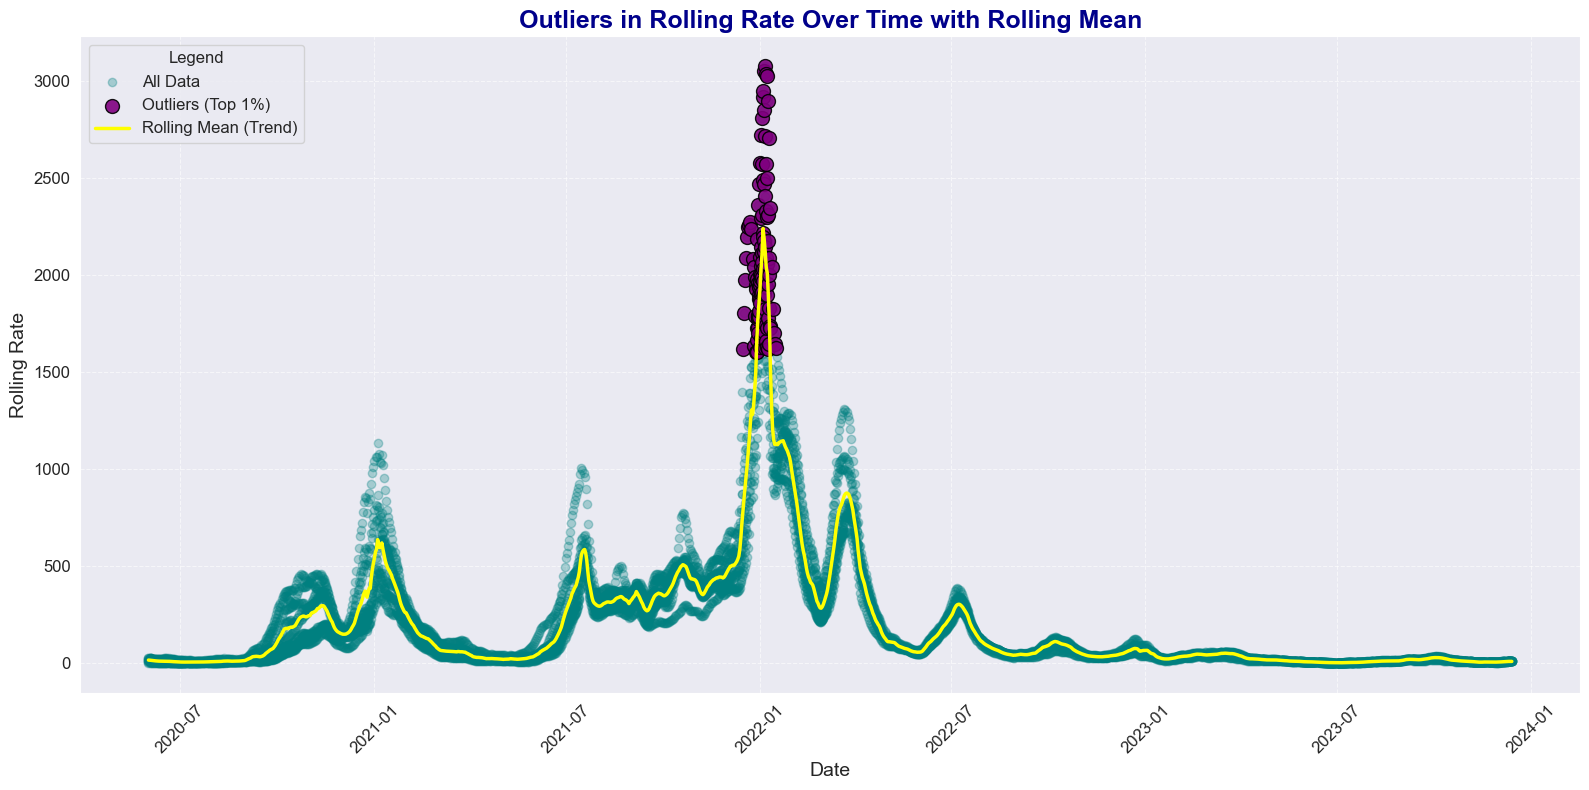

,date,new_first_episodes_by_specimen_date,new_cases_pcr_only_by_specimen_date,new_cases_lfd_only_by_specimen_date,new_cases_lfd_confirmed_by_pcr_by_specimen_date,new_cases_rolling_rate_by_specimen_date,new_cases_by_specimen_date,new_cases_by_publish_date_rolling_rate
count,117,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,2022-01-02 19:53:50.769230848,16194.726496,13441.256410,1439.076923,3098.760684,2072.512821,17979.094017,1768.115385
min,2021-12-16 00:00:00,4040.000000,1931.000000,389.000000,524.000000,1606.200000,4514.000000,1062.700000
25%,2021-12-31 00:00:00,10334.000000,7412.000000,944.000000,2271.000000,1790.000000,11564.000000,1565.600000
50%,2022-01-03 00:00:00,14798.000000,12063.000000,1328.000000,3018.000000,1983.800000,16482.000000,1772.400000
75%,2022-01-07 00:00:00,21027.000000,17996.000000,1794.000000,3936.000000,2248.300000,23993.000000,1896.200000
max,2022-01-16 00:00:00,35028.000000,32732.000000,3975.000000,5958.000000,3077.400000,40221.000000,2463.500000
std,NaN,7623.016419,7163.465044,665.502832,1175.136717,371.422193,8440.579462,306.484620


In [10]:
# Calculating the outlier threshold for rolling rates.
outlier_threshold = data["new_cases_rolling_rate_by_specimen_date"].quantile(0.99)
outliers = data[data["new_cases_rolling_rate_by_specimen_date"] > outlier_threshold]

# Plot.
plt.figure(figsize=(16, 8))
plt.scatter(
    data['date'],
    data['new_cases_rolling_rate_by_specimen_date'],
    color='teal',  
    alpha=0.3,
    label='All Data'
)

# Plot for outliers.
plt.scatter(
    outliers['date'],
    outliers['new_cases_rolling_rate_by_specimen_date'],
    color='purple', 
    edgecolor='black',
    s=100,
    label='Outliers (Top 1%)',
    alpha=0.9
)
# Adding a mean line.
rolling_mean = data.groupby('date')['new_cases_rolling_rate_by_specimen_date'].mean()
plt.plot(
    rolling_mean.index,
    rolling_mean,
    color='yellow',  
    linewidth=2.5,
    label='Rolling Mean (Trend)'
)
plt.title('Outliers in Rolling Rate Over Time with Rolling Mean', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rolling Rate', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left', title='Legend', title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()
outliers.describe()


### Correlation HEATMAP Analysis

From our heatmap I can see that there is strong positive correlation between:

- new_cases_by_specimen_date and new_first_episodes_by_specimen_date (both capture new cases in different contexts).
- new_cases_rolling_rate_by_specimen_date and new_cases_by_specimen_date, suggesting that the rolling rate effectively reflects new case trends.
- Lower correlations with new_cases_lfd_only_by_specimen_date highlights the distinct contribution of LFD-only cases compared to PCR-confirmed cases.

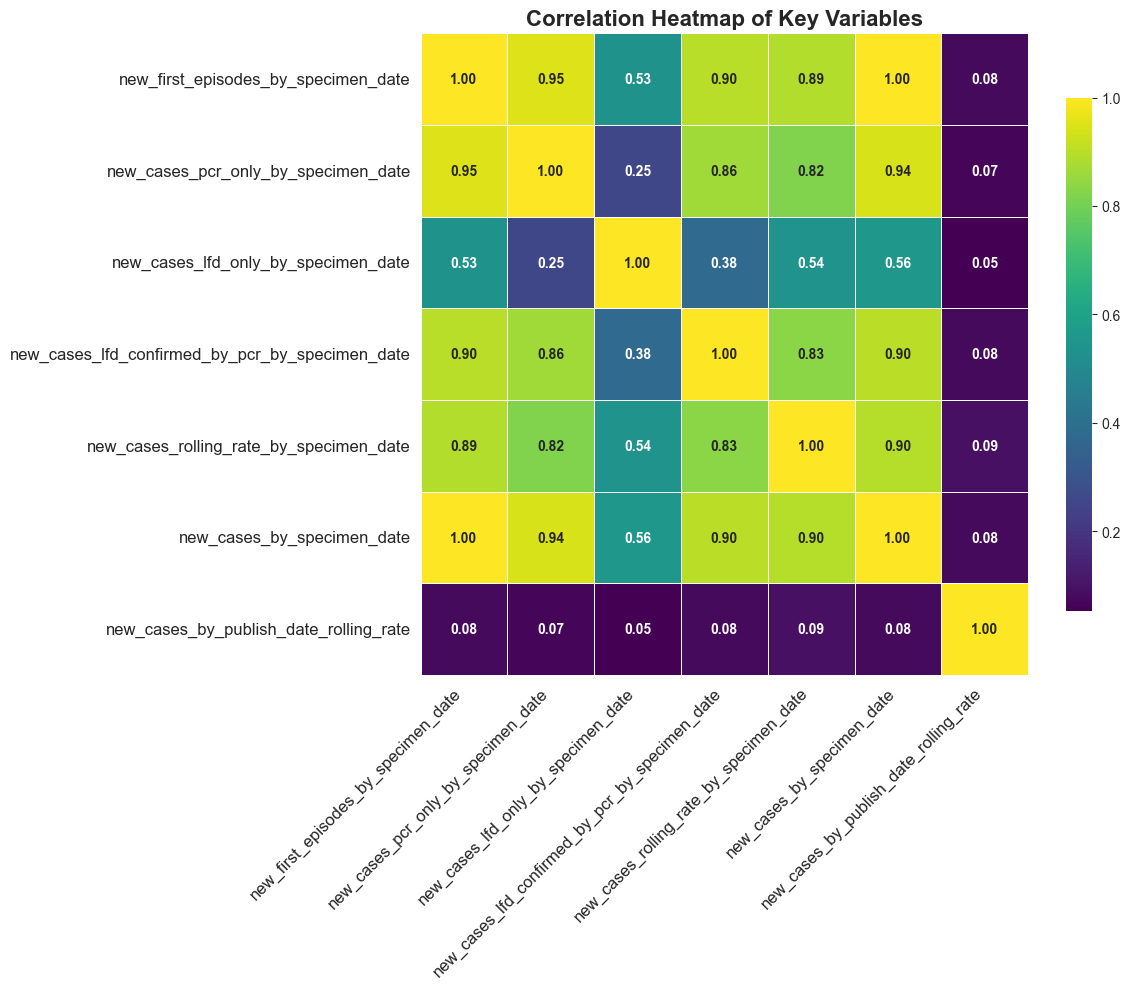

In [11]:
# Correlation matrix
correlation_matrix = data[
    [
        "new_first_episodes_by_specimen_date",
        "new_cases_pcr_only_by_specimen_date",
        "new_cases_lfd_only_by_specimen_date",
        "new_cases_lfd_confirmed_by_pcr_by_specimen_date",
        "new_cases_rolling_rate_by_specimen_date",
        "new_cases_by_specimen_date",
        "new_cases_by_publish_date_rolling_rate",
    ]
].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="viridis",  
    fmt=".2f",
    linewidths=0.7,
    cbar_kws={"shrink": 0.8, "orientation": "vertical"},
    annot_kws={"size": 10, "weight": "bold"}, 
)
plt.title("Correlation Heatmap of Key Variables", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12, rotation=45, ha="right") 
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### K-MEANS CLUSTERING 

 
The x-axis represents the average rolling rate of new cases for each region. The y-axis represents the total number of cases recorded in each region.
Each coloured group represents a cluster and in these clusters are the regions which share similar patterns in rolling rate and case totals. These clusters are made through the K-Means algorithm. The "X" marks the centroids of each cluster = The central point of each group.

- Cluster 0: Low Rolling Rate, Low Total Cases - regions in this cluster have the lowest rolling rates and total case numbers.This could include rural or less densely populated areas where either covid cases were less, i.e. transmission was slower, or the containment was effective. 

- Cluster 1: High Rolling Rate, High Total Cases - regions with the highest rolling rates and total case counts. Likely includes densely populated areas or regions with prolonged outbreaks, i.e. cities. These areas require more aggressive measure, and would benefit from mass testing, vaccination campaigns, and stricter controls. 

- Cluster 2: Intermediate/median Rolling Rate and Total Cases - this cluster represents regions with moderate rolling rates and total cases.
Could includes areas with mixed dynamics. It could be that interventions in these areas are having more of a partial impact.

NameError: name 'clustering_features' is not defined

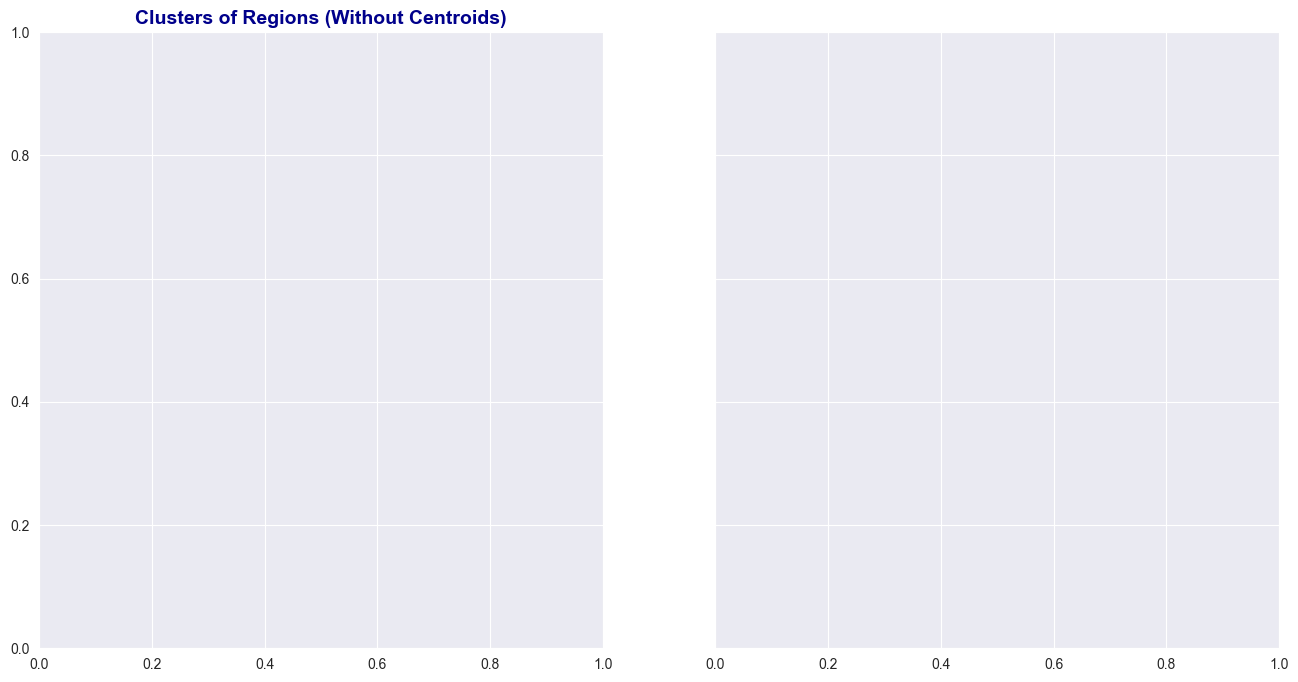

In [12]:
import matplotlib.pyplot as plt
cluster_colors = ['teal', 'purple', 'yellow']

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot 1
axes[0].set_title('Clusters of Regions (Without Centroids)', fontsize=14, fontweight='bold', color='darkblue')
for cluster, color in zip(clustering_features['cluster'].unique(), cluster_colors):
    cluster_data = clustering_features[clustering_features['cluster'] == cluster]
    axes[0].scatter(cluster_data['new_cases_rolling_rate_by_specimen_date'],
                    cluster_data['new_cases_by_specimen_date'],
                    label=f'Cluster {cluster}', color=color, s=100, alpha=0.8)
axes[0].set_xlabel('Average Rolling Rate', fontsize=12)
axes[0].set_ylabel('Total Cases', fontsize=12)
axes[0].legend(fontsize=10, title='Clusters', title_fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2
axes[1].set_title('Clusters of Regions (With Centroids)', fontsize=14, fontweight='bold', color='darkblue')
for cluster, color in zip(clustering_features['cluster'].unique(), cluster_colors):
    cluster_data = clustering_features[clustering_features['cluster'] == cluster]
    axes[1].scatter(cluster_data['new_cases_rolling_rate_by_specimen_date'],
                    cluster_data['new_cases_by_specimen_date'],
                    label=f'Cluster {cluster}', color=color, s=100, alpha=0.8)


axes[1].scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], 
                c='red', marker='X', s=200, label='Centroids', edgecolor='black')
axes[1].set_xlabel('Average Rolling Rate', fontsize=12)
axes[1].legend(fontsize=10, title='Clusters & Centroids', title_fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3) 
plt.show()
